

<a href="https://colab.research.google.com/drive/1HcEmn7uTokgXtvBh1gZawdtWVEfCaovG?usp=sharing" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/>
</a>

In [1]:
#1 Install necessary packages
!pip install -q unsloth accelerate bitsandbytes datasets transformers peft

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.2/193.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
#2 Load TinyLlama model using Unsloth
from unsloth import FastLanguageModel
import torch

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name="TinyLlama/TinyLlama-1.1B-Chat-v1.0",
    max_seq_length=2048,
    dtype=torch.float16,
    load_in_4bit=True
)

tokenizer.pad_token = tokenizer.eos_token


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
Unsloth: Failed to patch SmolVLMForConditionalGeneration forward function.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.4.1: Fast Llama patching. Transformers: 4.51.3.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/762M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.37k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

In [3]:
#3 Prepare a simulated low-resource language dataset
from datasets import Dataset

corpus = [
    {"text": "Sovari minta kalano vesti."},
    {"text": "Pravana torvik selomi vasti koran."},
    {"text": "Nokita valora sintra pavo venti."},
    {"text": "Lomari silvon ketra manar pusti."},
    {"text": "Zintara kovari pusto venami sinora."},
    {"text": "Tavari sentriko kamin valo nesti."},
    {"text": "Sindra molari vastina pota venito."},
    {"text": "Vintara zolik pinar solevi karana."},
    {"text": "Montari kivar lonte salvira poki."},
    {"text": "Kalvona mintra vitora zestro linar."},
    {"text": "Simora vatina korval senta loran."},
    {"text": "Varenta polina sakari montro veni."},
    {"text": "Prilan torvisto melar sintrova kani."},
    {"text": "Nastora vinkali torana kelvoti somar."},
    {"text": "Santara polvara minstri kovita jorano."},
    {"text": "Kelvora minstra pontri valoko sena."},
    {"text": "Zorika mantova selina kora vintari."}
]

dataset = Dataset.from_list(corpus)

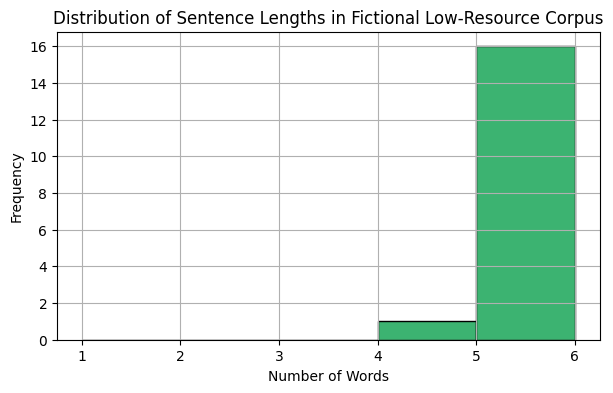


Sample Sentences from Corpus:
1. Sovari minta kalano vesti.
2. Pravana torvik selomi vasti koran.
3. Nokita valora sintra pavo venti.
4. Lomari silvon ketra manar pusti.
5. Zintara kovari pusto venami sinora.


In [20]:
#4 Visualize corpus characteristics

import matplotlib.pyplot as plt

# Create a list of sentence lengths (number of words per sentence)
sentence_lengths = [len(sentence['text'].split()) for sentence in corpus]

# Plot histogram of sentence lengths
plt.figure(figsize=(7, 4))
plt.hist(sentence_lengths, bins=range(1, max(sentence_lengths)+2), color='mediumseagreen', edgecolor='black')
plt.title('Distribution of Sentence Lengths in Fictional Low-Resource Corpus')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Show first few sentences nicely
print("\nSample Sentences from Corpus:")
for i, example in enumerate(corpus[:5], 1):
    print(f"{i}. {example['text']}")

In [4]:
#5 Tokenize the fictional corpus
def tokenize(example):
    encoded = tokenizer(
        example["text"],
        padding="max_length",
        truncation=True,
        max_length=512
    )
    encoded["labels"] = encoded["input_ids"].copy()
    return encoded

tokenized_dataset = dataset.map(tokenize, remove_columns=["text"])

Map:   0%|          | 0/17 [00:00<?, ? examples/s]

In [5]:
#6 Enable LoRA layers for efficient training
FastLanguageModel.for_training(model, use_gradient_checkpointing=True)
model = FastLanguageModel.get_peft_model(model)

Unsloth 2025.4.1 patched 22 layers with 22 QKV layers, 22 O layers and 22 MLP layers.


In [11]:
#7 Define Huggingface TrainingArguments for quick training
from transformers import TrainingArguments, Trainer, DataCollatorForLanguageModeling

training_args = TrainingArguments(
    output_dir="tinyllama_fictional_language_pretrain",
    per_device_train_batch_size=4,
    gradient_accumulation_steps=2,
    learning_rate=2e-4,
    num_train_epochs=5,
    max_steps=100,
    logging_steps=10,
    save_strategy="epoch",
    fp16=True,
    remove_unused_columns=False,
)

trainer = Trainer(
    model=model,
    train_dataset=tokenized_dataset,
    args=training_args,
    data_collator=DataCollatorForLanguageModeling(tokenizer, mlm=False)
)

In [12]:
#8 Start the pretraining process
trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 17 | Num Epochs = 50 | Total steps = 100
O^O/ \_/ \    Batch size per device = 4 | Gradient accumulation steps = 2
\        /    Data Parallel GPUs = 1 | Total batch size (4 x 2 x 1) = 8
 "-____-"     Trainable parameters = 12,615,680/4,000,000,000 (0.32% trained)


Step,Training Loss
10,4.107400
20,2.696500
30,1.569300
40,1.155800
50,0.798100
60,0.844900
70,0.530700
80,0.456800
90,0.369000
100,0.317400


TrainOutput(global_step=100, training_loss=1.2846011447906494, metrics={'train_runtime': 144.0071, 'train_samples_per_second': 5.555, 'train_steps_per_second': 0.694, 'total_flos': 1830346347773952.0, 'train_loss': 1.2846011447906494, 'epoch': 33.4})

In [13]:
#9 Save model and tokenizer after continued pretraining
model.save_pretrained("tinyllama_fictional_language_pretrain")
tokenizer.save_pretrained("tinyllama_fictional_language_pretrain")

('tinyllama_fictional_language_pretrain/tokenizer_config.json',
 'tinyllama_fictional_language_pretrain/special_tokens_map.json',
 'tinyllama_fictional_language_pretrain/tokenizer.model',
 'tinyllama_fictional_language_pretrain/added_tokens.json',
 'tinyllama_fictional_language_pretrain/tokenizer.json')

In [14]:
#10 Test model output after continued pretraining

model.eval()

test_prompt = "Vintara solami ketro pano"

inputs = tokenizer(test_prompt, return_tensors="pt").to(model.device)

with torch.no_grad():
    generated = model.generate(
        **inputs,
        max_new_tokens=60,
        temperature=0.7,
        top_p=0.9,
        do_sample=True
    )

output_text = tokenizer.decode(generated[0], skip_special_tokens=True)
print("Generated Sentence:")
print(output_text)

Generated Sentence:
Vintara solami ketro pano. Nostra nisi torquilum pano. Nostra nisi torquilum pano. Nostra nisi torquilum pano. Nostra nisi torquilum pano. Nostra nisi torquilum pano


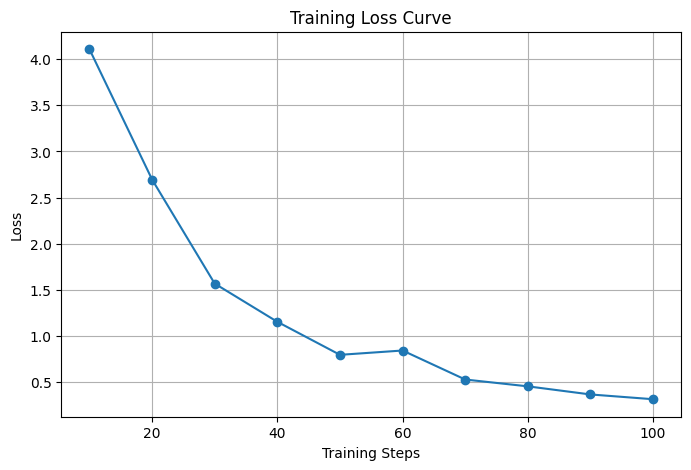

In [16]:
#11 Plot basic training loss if available
import matplotlib.pyplot as plt

# If trainer.state exists and has logs
if hasattr(trainer.state, 'log_history'):
    losses = []
    steps = []

    for log in trainer.state.log_history:
        if 'loss' in log:
            losses.append(log['loss'])
            steps.append(log['step'])

    plt.figure(figsize=(8, 5))
    plt.plot(steps, losses, marker='o')
    plt.xlabel('Training Steps')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.grid()
    plt.show()
else:
    print("No training loss available to plot yet.")

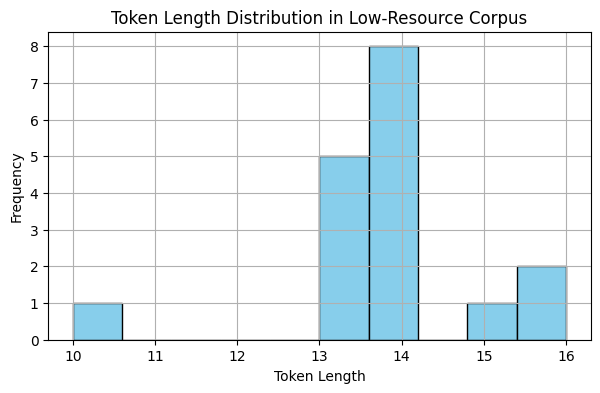

In [17]:
#12 Analyze tokenized input lengths
input_lengths = [len(tokenizer(example['text'])['input_ids']) for example in corpus]

plt.figure(figsize=(7, 4))
plt.hist(input_lengths, bins=10, color='skyblue', edgecolor='black')
plt.title("Token Length Distribution in Low-Resource Corpus")
plt.xlabel("Token Length")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [18]:
#13 Test model on multiple fictional prompts
model.eval()

prompts = [
    "Vintara solami ketro pano",
    "Sindra kelvoni vastino pravora",
    "Tavora sintara minso kelro",
]

for idx, p in enumerate(prompts, 1):
    inputs = tokenizer(p, return_tensors="pt").to(model.device)

    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=50,
            temperature=0.7,
            top_p=0.9,
            do_sample=True
        )

    decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)
    print(f"\nGenerated Text {idx}:\n{decoded}")


Generated Text 1:
Vintara solami ketro pano mesta.
 Vintara solami ketro pano mesta.
 Vintara solami ketro pano mesta.
 Vintara solami ketro pano mesta.
 Vintara solami ketro

Generated Text 2:
Sindra kelvoni vastino pravora.

Izvori:
- Pravora kelvoni vraža
- Vratnica kelvoni vraža
- Vratnica kelvoni vraža
- V

Generated Text 3:
Tavora sintara minso kelro.
Sintara kelro. Tavora minso kelro.
Tavora kelro. Minso kelro. Sintara minso kelro.
Minso kelro. Sintara k


In [21]:
from tabulate import tabulate

data = [
    ["Fictional Sentence", "English Translation"],
    ["Sovari minta kalano vesti.", "The brave warrior protects the village."],
    ["Pravana torvik selomi vasti koran.", "The traveler journeys across distant lands."],
    ["Nokita valora sintra pavo venti.", "A peaceful bird sings at dawn."],
    ["Lomari silvon ketra manar pusti.", "The ancient tree holds the spirit of life."],
    ["Zintara kovari pusto venami sinora.", "The golden river flows beyond the hills."],
    ["Tavari sentriko kamin valo nesti.", "The wise leader builds a strong future."],
    ["Sindra molari vastina pota venito.", "Children laugh as the rain touches the earth."],
    ["Vintara zolik pinar solevi karana.", "The bright stars guide the wanderers at night."],
    ["Montari kivar lonte salvira poki.", "The mountain paths hide many secrets."],
    ["Kalvona mintra vitora zestro linar.", "The cold wind carries the whisper of the forest."],
    ["Simora vatina korval senta loran.", "The swift river dances over stones."],
    ["Varenta polina sakari montro veni.", "Farmers gather the harvest under a red sky."],
    ["Prilan torvisto melar sintrova kani.", "Ancient songs echo through forgotten valleys."],
    ["Nastora vinkali torana kelvoti somar.", "The warrior's blade shines in the sunlight."],
    ["Santara polvara minstri kovita jorano.", "The peaceful villages thrive in unity."],
    ["Kelvora minstra pontri valoko sena.", "The guardian watches over sacred grounds."],
    ["Zorika mantova selina kora vintari.", "The moon's glow blesses the midnight forest."]
]

# Print nicely formatted table
print(tabulate(data, headers="firstrow", tablefmt="pretty"))

+----------------------------------------+--------------------------------------------------+
|           Fictional Sentence           |               English Translation                |
+----------------------------------------+--------------------------------------------------+
|       Sovari minta kalano vesti.       |     The brave warrior protects the village.      |
|   Pravana torvik selomi vasti koran.   |   The traveler journeys across distant lands.    |
|    Nokita valora sintra pavo venti.    |          A peaceful bird sings at dawn.          |
|    Lomari silvon ketra manar pusti.    |    The ancient tree holds the spirit of life.    |
|  Zintara kovari pusto venami sinora.   |     The golden river flows beyond the hills.     |
|   Tavari sentriko kamin valo nesti.    |     The wise leader builds a strong future.      |
|   Sindra molari vastina pota venito.   |  Children laugh as the rain touches the earth.   |
|   Vintara zolik pinar solevi karana.   |  The bright stars